In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error,r2_score

In [3]:
from sklearn.metrics import accuracy_score

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
df=pd.read_csv('Iris.csv')


# EDA

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [11]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


# Univariate Analysis

<BarContainer object of 150 artists>

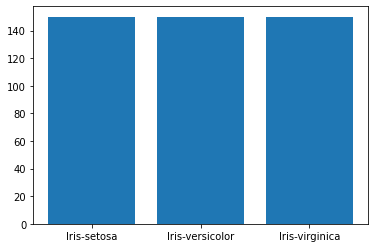

In [12]:
plt.bar(df['Species'],df['Species'].count())

<Axes: >

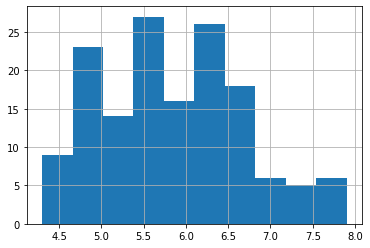

In [13]:
df['SepalLengthCm'].hist()

<Axes: >

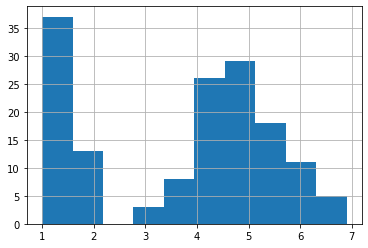

In [14]:
df['PetalLengthCm'].hist()

<Axes: >

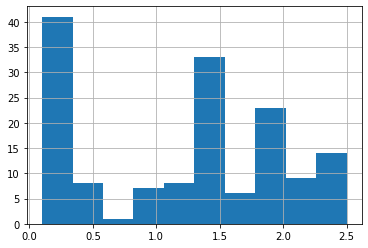

In [15]:
df['PetalWidthCm'].hist()

<Axes: >

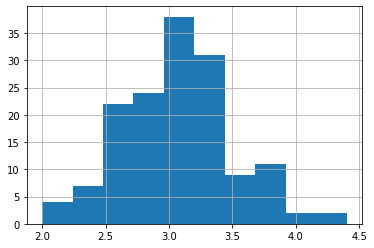

In [16]:
df['SepalWidthCm'].hist()

# Bivariate Analysis

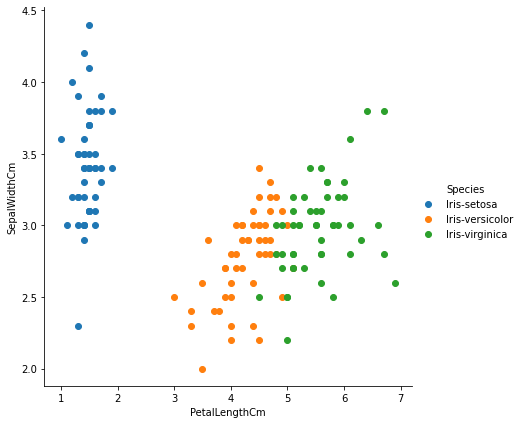

In [17]:
sns.FacetGrid(df, hue="Species",height=6).map(plt.scatter, "PetalLengthCm", "SepalWidthCm").add_legend()

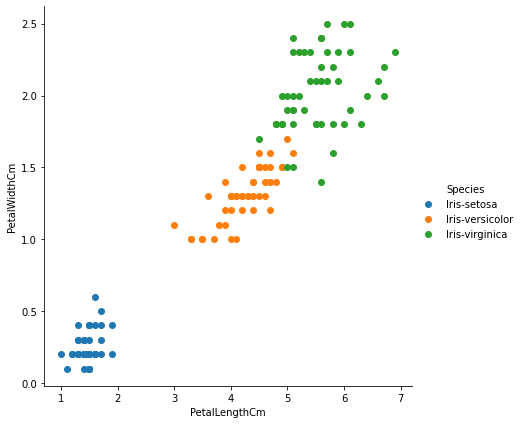

In [18]:
sns.FacetGrid(df, hue="Species",height=6).map(plt.scatter, "PetalLengthCm", "PetalWidthCm").add_legend()

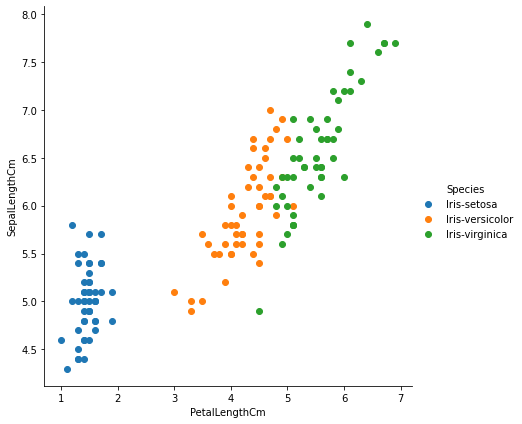

In [19]:
sns.FacetGrid(df, hue="Species",height=6).map(plt.scatter, "PetalLengthCm", "SepalLengthCm").add_legend()

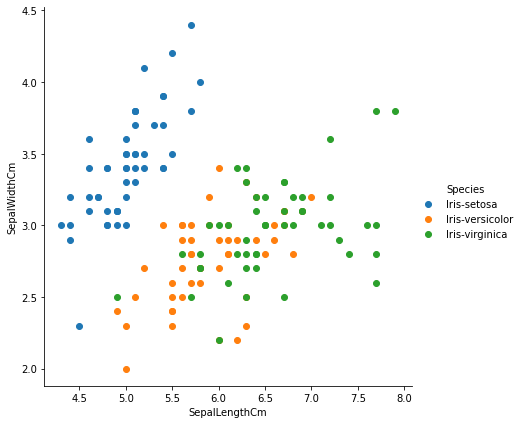

In [20]:
sns.FacetGrid(df, hue="Species",height=6).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()

In [21]:
dfcorr=df.drop(columns=['Species','Id']).corr()

# Correlation Matrix

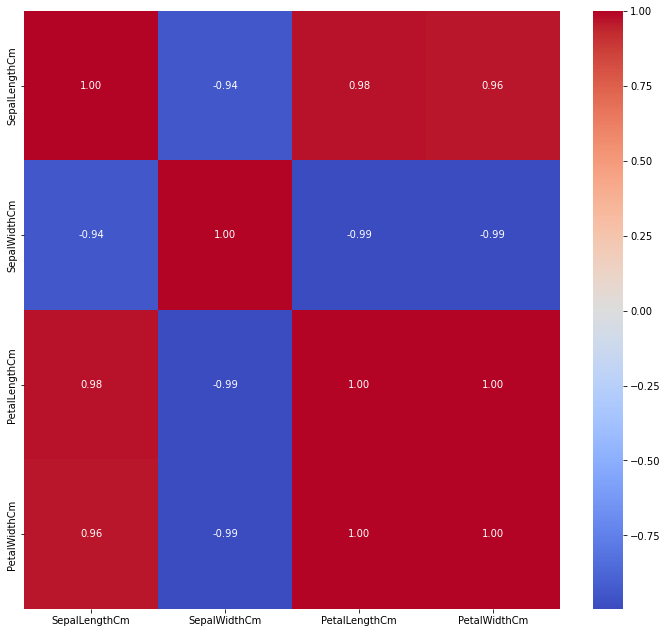

In [57]:
correlation_matrix=dfcorr.corr()
plt.figure(figsize=(12,11))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

# Splitting Train Test Data

In [50]:
X=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm']]
y=df[['Species']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)


<IPython.core.display.Javascript object>

# Applying Different Models

In [51]:
r2=[]
model_names=[]

In [52]:
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
lr = LogisticRegression()
clf = SVC(kernel='linear')
models = [rf,gb,lr,clf]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2.append(accuracy_score(y_test,y_pred)*100)
   
    
model_names = ['RandomForest','GradientBoost','LogisticRegression','SVM']
result_df = pd.DataFrame({'ACCURACY': r2},index=model_names)
result_df

,ACCURACY
RandomForest,88.888889
GradientBoost,91.111111
LogisticRegression,93.333333
SVM,97.777778


...........Hence, SVM gives us the highest accuracy!

In [35]:
clf.fit(X_train,y_train)

SVC(kernel='linear')

In [53]:
clf.predict([[5.1,3.5,1.4]])  #1

array(['Iris-setosa'], dtype=object)

In [54]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [55]:
clf.predict([[5.0,2.3,3.3]]) #94

array(['Iris-versicolor'], dtype=object)

In [56]:
clf.predict([[6.7,3.1,5.6]])    #141

array(['Iris-virginica'], dtype=object)

# Conclusion

Iris.csv was a clean and balanced dataset. Hence much datapreprocessing wasn't required. Different analysis were carried out 
to get insights of the dataset (univariate, bivariate etc). Furthermore, different Classification models such as SVM, Logistic Regression were trained and used to predict results. SVM provided the highest accuracy. Finally, data was selected randomly but manually from the dataset to predict the species which resulted in accurate results.